[35.01 36.82 37.15 37.55] [36.00374367 36.43325586 36.86276805 37.29228024]
Mean Squared Error: 0.3215047953649884
Model Coefficients: [0.42951219]
Model Intercept: -831.6108789263951
      Year  Billion Metric Tons
0   2023.0            37.292280
1   2024.0            37.721792
2   2025.0            38.151305
3   2026.0            38.580817
4   2027.0            39.010329
5   2028.0            39.439841
6   2029.0            39.869353
7   2030.0            40.298866
8   2031.0            40.728378
9   2032.0            41.157890
10  2033.0            41.587402
11  2034.0            42.016914
12  2035.0            42.446427
13  2036.0            42.875939
14  2037.0            43.305451
15  2038.0            43.734963
16  2039.0            44.164475
17  2040.0            44.593987
18  2041.0            45.023500
19  2042.0            45.453012
20  2043.0            45.882524
21  2044.0            46.312036
22  2045.0            46.741548
23  2046.0            47.171061
24  2047.0      

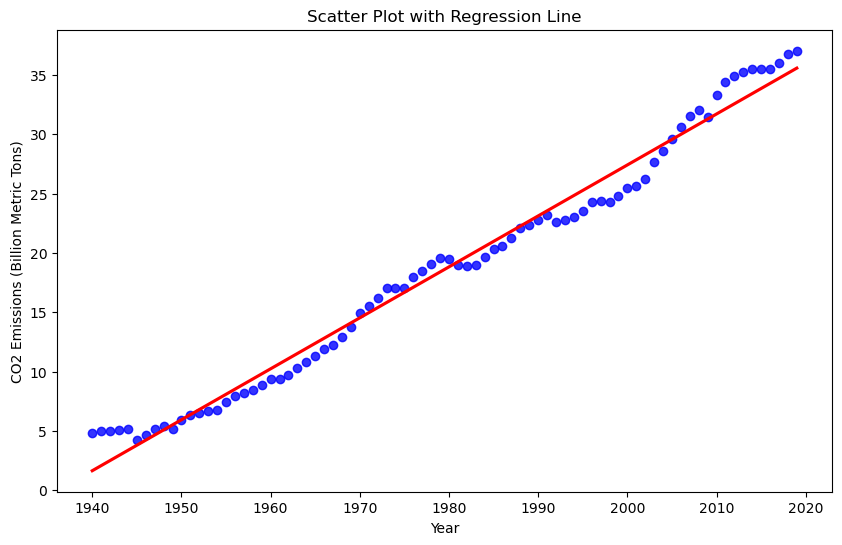

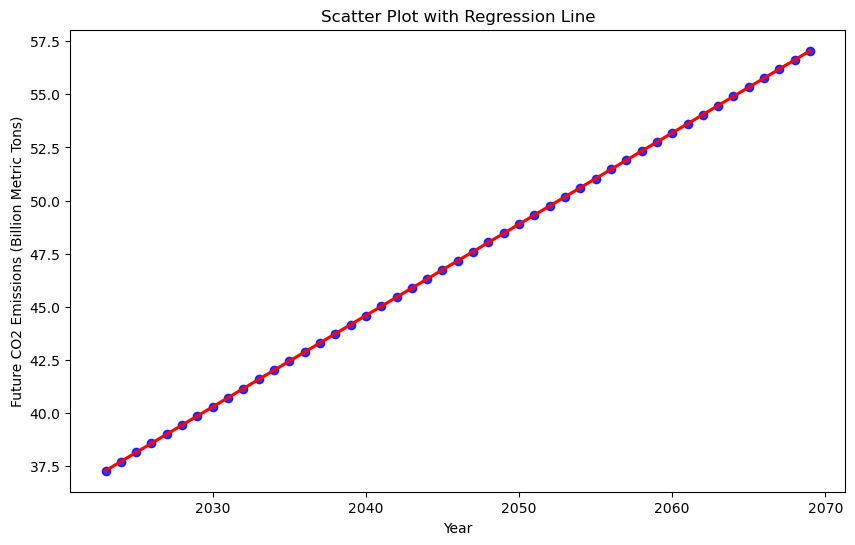

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

filePathTrain = '/Users/varun/Downloads/co2DataTrain.csv' 
filePathTest = '/Users/varun/Downloads/co2DataValidation.csv'

names = ['Year', 'Billion Metric Tons']
dataTrain = read_csv(filePathTrain)
dataTest = read_csv(filePathTest)

df1 = pd.DataFrame(dataTrain, columns=['Year','Billion Metric Tons'])
df2 = pd.DataFrame(dataTest, columns=['Year','Billion Metric Tons'])

df1 = df1.dropna()
df2 = df2.dropna()

X_train = df1.drop(columns=['Billion Metric Tons']).values
y_train = df1['Billion Metric Tons'].values

X_test = df2.drop(columns=['Billion Metric Tons']).values
y_test = df2['Billion Metric Tons'].values

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

# Predicting the next value using the most recent data
df3 = pd.DataFrame(columns=['Year', 'Billion Metric Tons'])

for year in range(2023, 2070):
    future_year = np.array([[year]])  # Replace with the desired future year
    future_prediction = model.predict(future_year)
    df3.loc[len(df3)] = [year, future_prediction[0]]

    #print(f'Predicted Metric Tons for {future_year[0][0]}:', future_prediction[0])


print(df3)


plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Billion Metric Tons', data=df1, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Billion Metric Tons)')
plt.title('Scatter Plot with Regression Line')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Billion Metric Tons', data=df3, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Future CO2 Emissions (Billion Metric Tons)')
plt.title('Scatter Plot with Regression Line')
plt.show()
